In [1]:
#pip install pmdarima
#pip install arch

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df_SPDR = pd.read_csv("GLD.csv")
df_SPDR.describe()

,Open,High,Low,Close,Adj Close,Volume
count,44.000000,44.000000,44.000000,44.000000,44.000000,4.400000e+01
mean,139.806591,140.299319,139.242501,139.781817,139.781817,7.570591e+06
std,1.698481,1.704518,1.683347,1.665070,1.665070,3.102116e+06
min,136.979996,137.210007,136.190002,137.009995,137.009995,3.620300e+06
25%,138.309998,138.777504,137.792503,138.255005,138.255005,5.121475e+06
50%,140.135002,140.580002,139.575005,140.114998,140.114998,6.670350e+06
75%,141.055004,141.680004,140.470005,140.862500,140.862500,9.764925e+06
max,142.789993,143.250000,142.009995,142.559998,142.559998,1.545910e+07


In [4]:
#df_SPDR=df_SPDR.drop(labels=["Open","High","Low","Close","Volume"],axis=1)
df_SPDR["Date"] = pd.to_datetime(df_SPDR["Date"], format="%Y-%m-%d")
df_SPDR.set_index("Date", inplace=True)
df_SPDR.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-30,139.770004,140.210007,138.029999,138.869995,138.869995,15459100
2019-10-01,138.070007,140.190002,137.800003,139.630005,139.630005,12476200
2019-10-02,140.789993,141.880005,140.460007,141.259995,141.259995,11914300
2019-10-03,141.360001,143.250000,141.289993,141.899994,141.899994,12396100
2019-10-04,141.479996,142.309998,141.139999,141.899994,141.899994,9651000


In [5]:
df_SPDR["Daily Return"] = df_SPDR["Adj Close"].pct_change(1)
df_SPDR=df_SPDR[df_SPDR['Daily Return'].notna()]
df_SPDR.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2019-10-01,138.070007,140.190002,137.800003,139.630005,139.630005,12476200,0.005473
2019-10-02,140.789993,141.880005,140.460007,141.259995,141.259995,11914300,0.011674
2019-10-03,141.360001,143.250000,141.289993,141.899994,141.899994,12396100,0.004531
2019-10-04,141.479996,142.309998,141.139999,141.899994,141.899994,9651000,0.000000
2019-10-07,141.160004,141.770004,140.240005,140.690002,140.690002,6127200,-0.008527


# 3. Data summaries

In [6]:
average_price=df_SPDR.resample('M').mean()
print("average price of SPDR gold ETF for Oct month is ", average_price['Adj Close'].iloc[0])
print("average price of SPDR gold ETF for Nov month is ", average_price['Adj Close'].iloc[1])

average price of SPDR gold ETF for Oct month is  140.87478182608695
average price of SPDR gold ETF for Nov month is  138.57049950000004


In [7]:
std_dev=df_SPDR.resample('M').std()
print("Standard deviation of SPDR gold ETF for Oct month is ", std_dev['Adj Close'].iloc[0])
print("Standard deviation of SPDR gold ETF for Nov month is ", std_dev['Adj Close'].iloc[1])

Standard deviation of SPDR gold ETF for Oct month is  0.8312292984587607
Standard deviation of SPDR gold ETF for Nov month is  1.5620946050997464


# 4. Graphing

Text(0.5, 1.0, 'Price plot for SPDR Gold ETF')

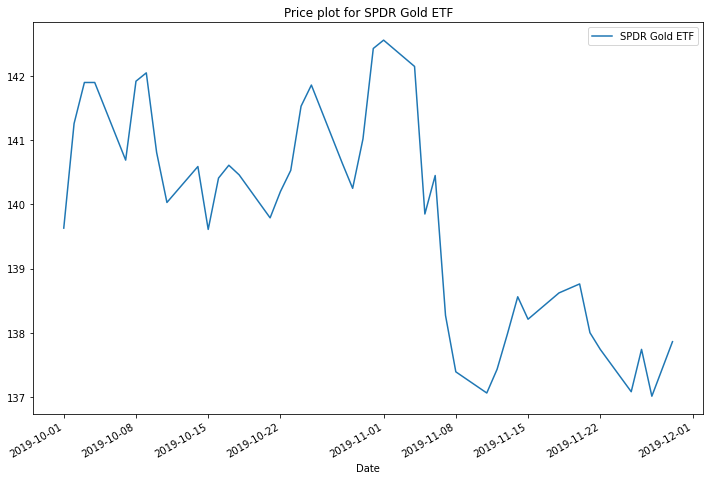

In [8]:
df_SPDR["Adj Close"].plot(figsize=(12,8),label="SPDR Gold ETF")
plt.legend();
plt.title("Price plot for SPDR Gold ETF")

In [9]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [10]:
def get_data(df, month, column):
    return df[(df.index >= f"2019-{month:02d}-01") & (df.index < f"2019-{(month+1):02d}-01")][column]

In [11]:
data=get_data(df_SPDR, 10, "Adj Close")
stepwise_fit= auto_arima(data,trace=True,d=None, supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=61.879, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=59.746, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=58.172, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=56.764, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=294.874, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=58.756, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=57.678, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=60.705, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.883 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   23
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -25.382
Date:                Mon, 27 Sep 2021   AIC                             56.764
Time:                        23:18:48   BIC                             60.171
Sample:                             0   HQIC                            57.621
                                 - 23                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    140.8759      0.222    635.941      0.000     140.442     141.310
ma.L1          0.4994      0.267      1.868      0.062      -0.025       1.023
sigma2         0.5256      0.210      2.499      0.012       0.113       0.938
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.70
Prob(Q):                              0.92   Prob(JB):                         0.71
Heteroskedasticity (H):               0.67   Skew:                             0.12
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats

In [13]:
def get_data(df, month, column):
    return df[(df.index >= f"2019-{month:02d}-01") & (df.index < f"2019-{(month+1):02d}-01")][column]

In [14]:
def fit_arima(data):
    model = ARIMA(data, order=(0,0,1))
    model_fit = model.fit()
    print(model_fit.summary())
    residuals = pd.DataFrame(model_fit.resid)
    ax1 = residuals.plot(label='residual')
    plt.title("Residuals during the month")
    ax1.get_legend().remove()
    plt.show()
    ax2 = residuals.plot(kind='kde')
    plt.title("Kernel density estimation of the residuals")
    ax2.get_legend().remove()
    plt.show()

ARMA model for SPDR gold ETF in Oct
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                   23
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -25.382
Date:                Mon, 27 Sep 2021   AIC                             56.764
Time:                        23:18:48   BIC                             60.171
Sample:                    10-01-2019   HQIC                            57.621
                         - 10-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        140.8759      0.222    635.945      0.000     140.442     141.310
ma.L1          0.4994      0.267      1.868      0.062      -0.025       1.023
sigma2         0

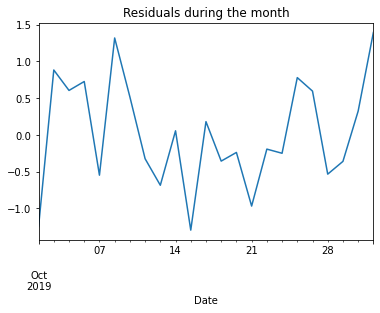

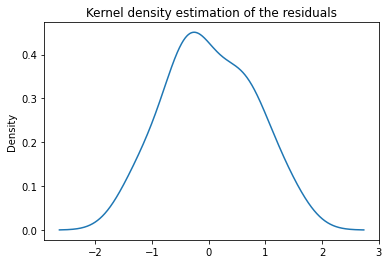

ARMA model for SPDR gold ETF in Nov
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                   20
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -31.374
Date:                Mon, 27 Sep 2021   AIC                             68.747
Time:                        23:18:48   BIC                             71.735
Sample:                             0   HQIC                            69.331
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        138.6324      0.823    168.417      0.000     137.019     140.246
ma.L1          0.6389      0.466      1.372      0.170      -0.274       1.551
sigma2         1

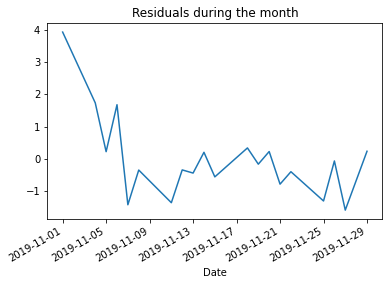

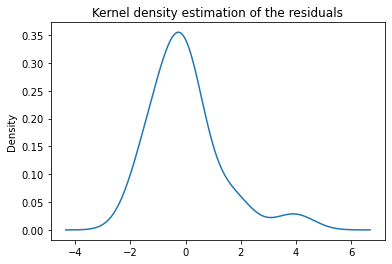

In [15]:
month_wise = {10:"Oct", 11:"Nov"}
for mth in [10, 11]:
    print(f"ARMA model for SPDR gold ETF in {month_wise[mth]}")
    data = get_data(df_SPDR, mth, "Adj Close")
    fit_arima(data)

# 7. Modelling Volitility

In [16]:
df_SPDR["High minus Low"]= df_SPDR["High"]-df_SPDR["Low"]
df_SPDR.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,High minus Low
Date,,,,,,,,
2019-10-01,138.070007,140.190002,137.800003,139.630005,139.630005,12476200,0.005473,2.389999
2019-10-02,140.789993,141.880005,140.460007,141.259995,141.259995,11914300,0.011674,1.419998
2019-10-03,141.360001,143.250000,141.289993,141.899994,141.899994,12396100,0.004531,1.960007
2019-10-04,141.479996,142.309998,141.139999,141.899994,141.899994,9651000,0.000000,1.169999
2019-10-07,141.160004,141.770004,140.240005,140.690002,140.690002,6127200,-0.008527,1.529999


In [17]:
avg_HNL=df_SPDR.resample('M').mean()
avg_HNL

,Open,High,Low,Close,Adj Close,Volume,Daily Return,High minus Low
Date,,,,,,,,
2019-10-31,140.847391,141.384349,140.303043,140.874782,140.874782,7.757287e+06,0.001119,1.081305
2019-11-30,138.611500,139.056000,138.083502,138.570500,138.570500,6.961465e+06,-0.001611,0.972498


In [18]:
stdev_HNL=df_SPDR.resample('M').std()
stdev_HNL

,Open,High,Low,Close,Adj Close,Volume,Daily Return,High minus Low
Date,,,,,,,,
2019-10-31,0.972620,0.929309,0.950674,0.831229,0.831229,2.804293e+06,0.006106,0.479405
2019-11-30,1.618235,1.588269,1.585444,1.562095,1.562095,2.994154e+06,0.006188,0.492552


In [19]:
import arch

In [20]:
def fit_garch(data):
    garch = arch.arch_model(data, vol='garch', p=1, o=0, q=1)
    garch_fitted = garch.fit()
    print(garch_fitted.summary())

In [21]:
for mth in [10, 11]:
    print(f"GARCH model for SPDR gol ETF in {month_wise[mth]}")
    model_data= get_data(df_SPDR, mth, "Daily Return")
    #model_data = model_data.dropna()
    fit_garch(model_data)

GARCH model for SPDR gol ETF in Oct
Iteration:      1,   Func. Count:      6,   Neg. LLF: 208954177912138.06
Iteration:      2,   Func. Count:     16,   Neg. LLF: -85.13500713988063
Optimization terminated successfully    (Exit mode 0)
            Current function value: -85.13500715326597
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:           Daily Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                85.1350
Distribution:                  Normal   AIC:                          -162.270
Method:            Maximum Likelihood   BIC:                          -157.728
                                        No. Observations:                   23
Date:                Mon, Sep 27 2021   Df Residuals:    

 US TREASURY YIELDS

In [22]:
df_YLD = pd.read_csv("usty.csv")

In [23]:
df_YLD.head()

,Date,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr
0,10/1/2019,1.56,1.51,1.51,1.59,1.65,2.11
1,10/2/2019,1.48,1.43,1.43,1.53,1.60,2.09
2,10/3/2019,1.39,1.34,1.34,1.45,1.54,2.04
3,10/4/2019,1.40,1.35,1.34,1.43,1.52,2.01
4,10/7/2019,1.46,1.41,1.38,1.47,1.56,2.05


In [24]:
df_YLD.tail()

,Date,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr
36,11/22/2019,1.61,1.60,1.62,1.71,1.77,2.22
37,11/25/2019,1.61,1.60,1.62,1.71,1.76,2.21
38,11/26/2019,1.58,1.58,1.58,1.68,1.74,2.18
39,11/27/2019,1.63,1.61,1.63,1.71,1.77,2.19
40,11/29/2019,1.61,1.61,1.62,1.73,1.78,2.21


In [25]:
df_YLD["Date"] = pd.to_datetime(df_YLD["Date"], format="%m/%d/%Y")
df_YLD.set_index("Date", inplace=True)
df_YLD.head()

,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr
Date,,,,,,
2019-10-01,1.56,1.51,1.51,1.59,1.65,2.11
2019-10-02,1.48,1.43,1.43,1.53,1.60,2.09
2019-10-03,1.39,1.34,1.34,1.45,1.54,2.04
2019-10-04,1.40,1.35,1.34,1.43,1.52,2.01
2019-10-07,1.46,1.41,1.38,1.47,1.56,2.05


In [26]:
def get_data1(df, month, column):
    return df[(df.index >= f"{month:02d}/01/2019") & (df.index < f"{(month+1):02d}/01/2019")][column]

In [27]:
average_price11=df_YLD.resample('M').mean()
average_price11

,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr
Date,,,,,,
2019-10-31,1.551364,1.528182,1.525000,1.615000,1.706818,2.190455
2019-11-30,1.612632,1.612105,1.639474,1.735789,1.812105,2.280526


In [28]:
pip install nelson-siegel-svensson

Note: you may need to restart the kernel to use updated packages.


In [29]:
from nelson_siegel_svensson import NelsonSiegelSvenssonCurve, NelsonSiegelCurve
from nelson_siegel_svensson.calibrate import calibrate_ns_ols, calibrate_nss_ols

NelsonSiegelSvenssonCurve(beta0=2.645710487459981, beta1=-0.6719604637555316, beta2=-1.411767032309886, beta3=-2.035757667745372, tau1=1.5991632396669733, tau2=5.180449901447694)


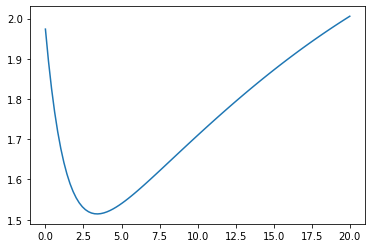

In [30]:
time_period =np.array([2.0,3.0,5.0,7.0,10.0,30.0])
avg_yld = np.array([1.551364,1.528182,1.525000,1.615000,1.706818,2.190455])
#avg_yld = np.array([1.612632,1.612105,1.639474,1.735789,1.812105,2.280526])
curve_fit, status = calibrate_nss_ols(time_period,avg_yld)
NSS_ZC = NelsonSiegelSvenssonCurve.zero(curve_fit,time_period)
NSS_ZC
October_curve, status = calibrate_nss_ols(time_period,NSS_ZC)
assert status.success
print(October_curve)

t_scale = np.linspace(0,20,100)
plt.plot(t_scale,October_curve(t_scale))
plt.show()

NelsonSiegelSvenssonCurve(beta0=391.2663143598604, beta1=-389.4677603672869, beta2=-139.5879761100773, beta3=-966.2159137274052, tau1=9.158999257478253, tau2=34.9982121903236)


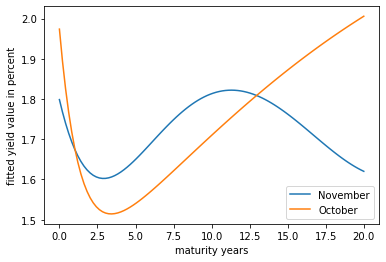

In [32]:
time_period =np.array([2.0,3.0,5.0,7.0,10.0,30.0])
#avg_yld = np.array([1.551364,1.528182,1.525000,1.615000,1.706818,2.190455])
#y =     np.array([1.551385,1.527154,1.525115,1.614000,1.701423,2.187269])
avg_yld = np.array([1.612632,1.612105,1.639474,1.735789,1.812105,2.280526])
curve_fit, status = calibrate_nss_ols(time_period,avg_yld)
NSS_ZC = NelsonSiegelSvenssonCurve.zero(curve_fit,time_period)
NSS_ZC
November_curve, status = calibrate_nss_ols(time_period,NSS_ZC)
assert status.success
print(November_curve)

t_scale = np.linspace(0,20,100)
plt.plot(t_scale,November_curve(t_scale), label='November')
plt.plot(t_scale,October_curve(t_scale), label='October')
plt.legend()
plt.xlabel('maturity years')
plt.ylabel('fitted yield value in percent')
plt.show()